In [1]:
import kagglehub
import matplotlib.pyplot as plt
import pandas as pd

# Download latest version of fashion-mnist from kaggle
path = kagglehub.dataset_download("zalando-research/fashionmnist")
print("Path to dataset files:", path)

/home/tianchu/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/tianchu/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


In [2]:
# load the training and testing dataset
train = pd.read_csv(path+"/fashion-mnist_train.csv")
test = pd.read_csv(path+"/fashion-mnist_test.csv")
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [3]:
test.describe()
num_classes = test['label'].max() + 1

In [4]:
x_train = train.drop('label',axis=1)
x_test = test.drop('label', axis=1)
y_train = train['label']
y_test = test['label']

In [5]:
x_train.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [6]:
from sklearn.preprocessing import StandardScaler
#normalization and standardization
x_train = x_train / 255.0
x_test = x_test / 255.0
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print("shape of the training dataset: ", x_train.shape)

shape of the training dataset:  (60000, 784)


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score

In [8]:
pca = PCA(n_components=20)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)
clf_pca = KNeighborsClassifier(n_neighbors=5)
clf_pca.fit(x_train_pca, y_train)
y_pred_pca = clf_pca.predict(x_test_pca)

clf_no_pca = KNeighborsClassifier(n_neighbors=5)
clf_no_pca.fit(x_train, y_train)
y_pred_no_pca = clf_no_pca.predict(x_test)



In [9]:
# print the classification report for the reduced dataset
print(classification_report(y_test, y_pred_pca))
print(confusion_matrix(y_test, y_pred_pca))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.75      0.77      0.76      1000
           3       0.87      0.88      0.87      1000
           4       0.74      0.78      0.76      1000
           5       0.94      0.87      0.90      1000
           6       0.67      0.58      0.62      1000
           7       0.87      0.90      0.88      1000
           8       0.97      0.95      0.96      1000
           9       0.89      0.93      0.91      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

[[833   2  21  34   7   0  93   1   9   0]
 [  8 961   3  19   2   0   5   0   1   1]
 [ 17   2 766   9 122   0  82   0   2   0]
 [ 35  19  15 876  41   0  12   0   2   0]
 [  6   0 104  35 776   0  76   0   3   0]
 [  0   0   0   2   0 868 

In [10]:
# print the classification report for the original dataset
print(classification_report(y_test, y_pred_no_pca))
print(confusion_matrix(y_test, y_pred_no_pca))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      1000
           1       0.98      0.97      0.98      1000
           2       0.77      0.79      0.78      1000
           3       0.91      0.89      0.90      1000
           4       0.79      0.80      0.80      1000
           5       0.99      0.84      0.91      1000
           6       0.68      0.61      0.65      1000
           7       0.88      0.94      0.91      1000
           8       0.98      0.94      0.96      1000
           9       0.89      0.96      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000

[[879   2  14  13   5   0  80   1   5   1]
 [  5 973   2  14   3   0   3   0   0   0]
 [ 20   0 793  12  97   0  77   0   1   0]
 [ 37   9  12 885  32   0  25   0   0   0]
 [  2   0  91  27 801   0  78   0   1   0]
 [  2   0   1   1   0 839 

In [11]:
def dimensionality_reduction_classification(x_train, x_test, y_train, y_test, method, n_components):
    if method == 'PCA':
        reducer = PCA(n_components=n_components)
    elif method == 'LDA':
        reducer = LDA(n_components=n_components)

    # apply dimensionality reduction
    X_train_reduced = reducer.fit_transform(x_train, y_train)
    X_test_reduced = reducer.transform(x_test)

    # apply k-NN classifier
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train_reduced, y_train)
    y_pred = classifier.predict(X_test_reduced)

    # calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

In [12]:
dimensions_pca = [1, 2, 5, 10, 20, 50, 100, 200, 300]
dimensions_lda = [1, 2, 3, 4, 5, 6, 7, 8, 9] # LDA can only reduce to num_classes - 1 dimensions
methods = ['PCA', 'LDA']
results = {}
for method in methods:
    results[method] = []
    if method == 'PCA':
        dimensions = dimensions_pca
    else:
        dimensions = dimensions_lda

    for n in dimensions:
        accuracy = dimensionality_reduction_classification(x_train, x_test, y_train, y_test, method, n)
        results[method].append(accuracy)
        print(f"{method} with {n} dimensions accuracy score: {accuracy}")



PCA with 1 dimensions accuracy score: 0.2433
PCA with 2 dimensions accuracy score: 0.5082
PCA with 5 dimensions accuracy score: 0.7412
PCA with 10 dimensions accuracy score: 0.8133
PCA with 20 dimensions accuracy score: 0.844
PCA with 50 dimensions accuracy score: 0.8597
PCA with 100 dimensions accuracy score: 0.8684
PCA with 200 dimensions accuracy score: 0.8699
PCA with 300 dimensions accuracy score: 0.8697
LDA with 1 dimensions accuracy score: 0.4252
LDA with 2 dimensions accuracy score: 0.5555
LDA with 3 dimensions accuracy score: 0.6447
LDA with 4 dimensions accuracy score: 0.6831
LDA with 5 dimensions accuracy score: 0.7409
LDA with 6 dimensions accuracy score: 0.7829
LDA with 7 dimensions accuracy score: 0.788
LDA with 8 dimensions accuracy score: 0.8261
LDA with 9 dimensions accuracy score: 0.8326


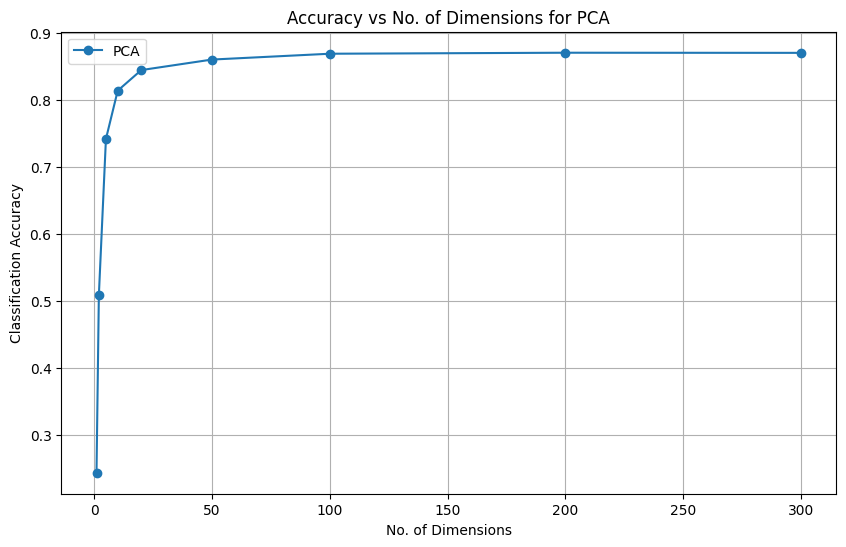

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(dimensions_pca, results['PCA'], marker='o', label='PCA')
plt.xlabel('No. of Dimensions')
plt.ylabel('Classification Accuracy')
plt.title('Accuracy vs No. of Dimensions for PCA')
plt.legend()
plt.grid(True)
plt.savefig('accuracy_vs_components_pca.png',format='png')
plt.show()

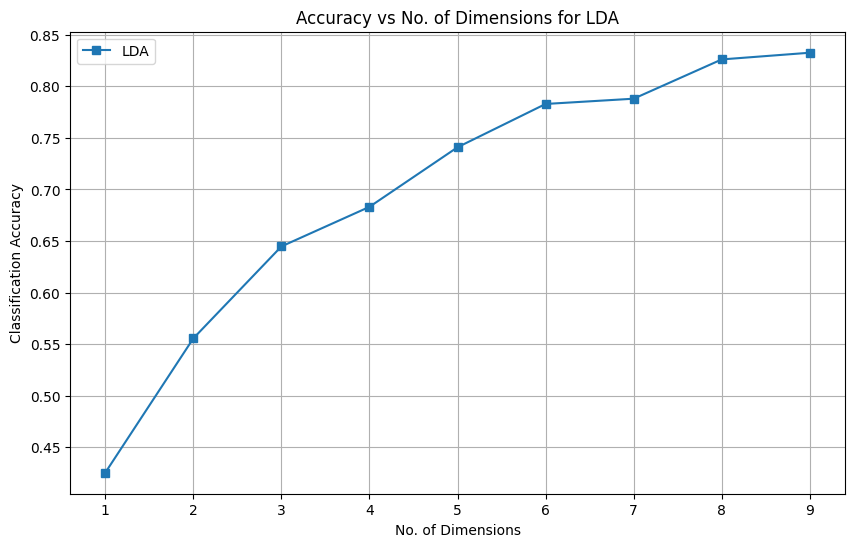

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(dimensions_lda, results['LDA'], marker='s', label='LDA')
plt.xlabel('No. of Dimensions')
plt.ylabel('Classification Accuracy')
plt.title('Accuracy vs No. of Dimensions for LDA')
plt.legend()
plt.grid(True)
plt.savefig('accuracy_vs_components_lda.png',format='png')
plt.show()

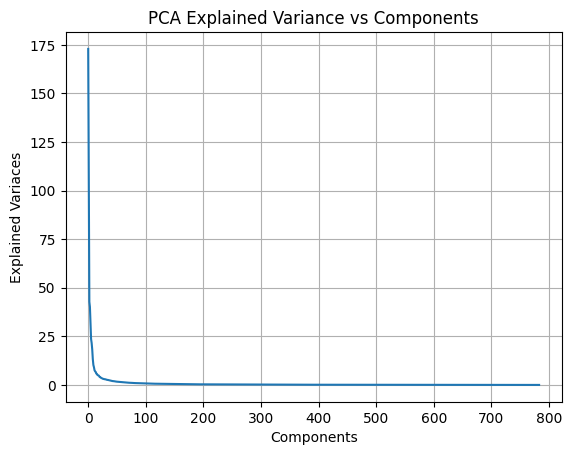

In [24]:
pca = PCA().fit(x_train)
exp_var_pca = pca.explained_variance_

plt.plot(exp_var_pca)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.title('PCA Explained Variance vs Components')
plt.grid(True)
plt.savefig('explained_variance_pca.png',format='png')
plt.show()